In [158]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [171]:
# We call the csv data
df = pd.read_csv('/Users/manarogers/Desktop/WinePrediction/data/raw/winequalityN.csv')
# We fill the NaN numerical values with 0
df.fillna(df.select_dtypes(include='number').mean(), inplace=True)

# White wine
dfW = df[df['type'] == 'white']
dfW = dfW.drop('type', axis=1)

### Remove the following code chunk if not condensing output classes into three classes for quality

In [173]:
# Convert the target variable 'quality' to categorical classes
def categorize_quality(row):
    if row <= 4:
        return 'low'
    elif 5 <= row <= 7:
        return 'medium'
    else:
        return 'high'

# Apply the function to the 'quality' column to convert it to 'low', 'medium', 'high'
dfW['quality'] = dfW['quality'].apply(categorize_quality)

### Let's incorporate Gridsearch into the funtion as well. 

In [78]:
from sklearn.model_selection import GridSearchCV

In [273]:
#define a function to make this a little more convenient through feature selection
#parameters can be added for feature selection that map to c and gamma

def get_SVM_Metrics(dataframe, param_grid=None, scale_features=True):
    y = dataframe['quality']
    X = dataframe.drop('quality', axis=1)
    
    # We split the data into training and testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scale the features if requested
    if scale_features:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
    
    #Create a svm Classifier
    classifier = svm.SVC(kernel='rbf') # Linear Kernel

    # Perform GridSearchCV if a parameter grid is provided
    if param_grid:
        grid_search = GridSearchCV(classifier, param_grid, cv=5, verbose=1, n_jobs=-1)
        grid_search.fit(X_train, y_train)
        print(f"Best parameters found: {grid_search.best_params_}")
        classifier = grid_search.best_estimator_
    else:
        # Train the model using the training set
        classifier.fit(X_train, y_train)
    
    # Predict the response for the test dataset
    y_pred = classifier.predict(X_test)
    
    # Calculate the metrics: accuracy, precision, recall, and F1 score
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)  # Weighted for multi-class
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

    # Print the results
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    
    # Return the metrics
    return accuracy, precision, recall, f1


In [275]:
dfW.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [277]:
metrics_scores = {}
features_dropped = {}

In [279]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [11, 12, 13, 14, 15], 
    'gamma': ['scale', 'auto', 0.1, 1]
}

### Using all Features

In [282]:
#Get the accuracy using all features and Gridsearch for the best hyperparameters
metrics = get_SVM_Metrics(dfW, param_grid = param_grid, scale_features=True)

# Print the accuracy score
print(f"Model metrics: {metrics}")
metrics_scores["None"] = metrics 


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters found: {'C': 11, 'gamma': 1}
Accuracy: 0.9459
Precision: 0.9338
Recall: 0.9459
F1 Score: 0.9341
Model metrics: (0.9459183673469388, 0.9337716218562897, 0.9459183673469388, 0.9340807381107771)


### Without Residual Sugar

In [285]:
#Get the accuracy using without residual sugar using Gridsearch
dfW_no_residual_sugar = dfW.drop(columns=['residual sugar'])

metrics = get_SVM_Metrics(dfW_no_residual_sugar, param_grid = param_grid, scale_features=True)

# Print the accuracy score
print(f"Model metrics: {metrics}")
metrics_scores["Residual Sugar"] = metrics 

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters found: {'C': 11, 'gamma': 1}
Accuracy: 0.9459
Precision: 0.9338
Recall: 0.9459
F1 Score: 0.9341
Model metrics: (0.9459183673469388, 0.9337716218562897, 0.9459183673469388, 0.9340807381107771)


In [286]:
dfW_no_residual_sugar.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
       'sulphates', 'alcohol', 'quality'],
      dtype='object')

### Without Density

In [290]:
#Get the accuracy using without density using Gridsearch
dfW_no_density = dfW.drop(columns=['density'])

metrics = get_SVM_Metrics(dfW_no_density, param_grid = param_grid, scale_features=True)

# Print the accuracy score
print(f"Model metrics: {metrics}")
metrics_scores["Density"] = metrics 

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters found: {'C': 11, 'gamma': 1}
Accuracy: 0.9449
Precision: 0.9324
Recall: 0.9449
F1 Score: 0.9334
Model metrics: (0.9448979591836735, 0.932363837455234, 0.9448979591836735, 0.9334097532935098)


### Without Alchohol

In [229]:
#Get the accuracy using without alcohol using Gridsearch
dfW_no_alcohol =  dfW.drop(columns=['alcohol'])

metrics = get_SVM_Metrics(dfW_no_alcohol, param_grid = param_grid, scale_features=True)

# Print the accuracy score
print(f"Model metrics: {metrics}")
metrics_scores["Alcohol"] = metrics 

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters found: {'C': 11, 'gamma': 1}
Accuracy: 0.9418
Precision: 0.9276
Recall: 0.9418
F1 Score: 0.9302
Model metrics: (0.9418367346938775, 0.9276009213209092, 0.9418367346938775, 0.9301585468297131)


In [231]:
print(metrics_scores)


{'None': (0.9459183673469388, 0.9337716218562897, 0.9459183673469388, 0.9340807381107771), 'Residual Sugar': (0.9459183673469388, 0.9337716218562897, 0.9459183673469388, 0.9340807381107771), 'Density': (0.9448979591836735, 0.932363837455234, 0.9448979591836735, 0.9334097532935098), 'Alcohol': (0.9418367346938775, 0.9276009213209092, 0.9418367346938775, 0.9301585468297131)}


In [235]:
import matplotlib.pyplot as plt
import numpy as np

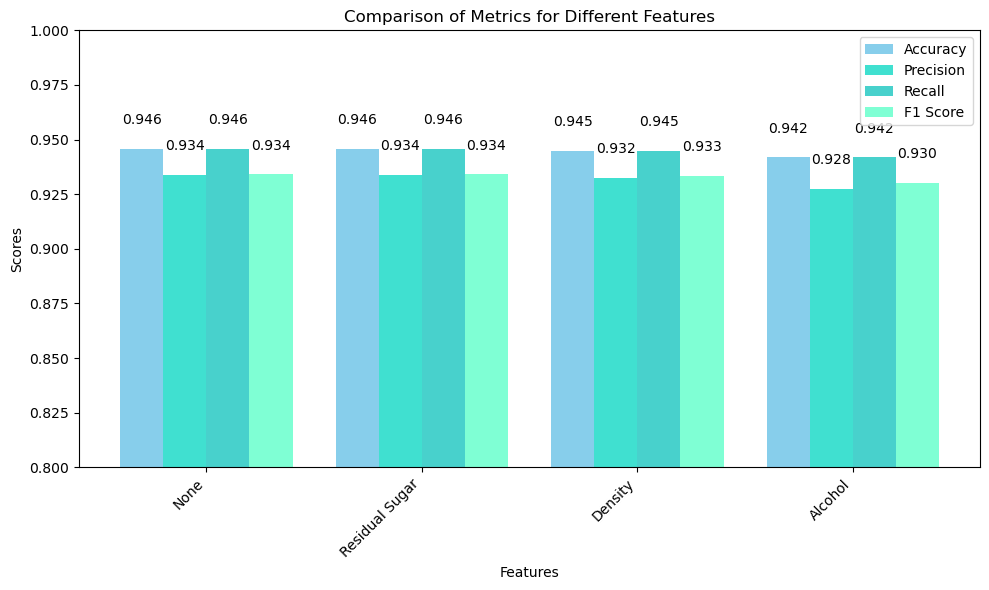

In [261]:
# Extracting keys (features) and the corresponding metric values
features = list(metrics_scores.keys())
metrics = np.array(list(metrics_scores.values()))

# Extracting individual metrics (accuracy, precision, recall, F1)
accuracy_scores = metrics[:, 0]
precision_scores = metrics[:, 1]
recall_scores = metrics[:, 2]
f1_scores = metrics[:, 3]

# Set up the bar plot width and positions
x = np.arange(len(features))  # positions for the bars
width = 0.2  # the width of the bars

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each metric (accuracy, precision, recall, F1)
bars1 = ax.bar(x - width * 1.5, accuracy_scores, width, label='Accuracy', color='skyblue')
bars2 = ax.bar(x - width * 0.5, precision_scores, width, label='Precision', color='turquoise')
bars3 = ax.bar(x + width * 0.5, recall_scores, width, label='Recall', color='mediumturquoise')
bars4 = ax.bar(x + width * 1.5, f1_scores, width, label='F1 Score', color='aquamarine')

# Add labels, title, and custom x-axis ticks
ax.set_xlabel('Features')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Metrics for Different Features')
ax.set_xticks(x)
ax.set_xticklabels(features, rotation=45, ha="right")

#adjust range of y visualized
ax.set_ylim(0.8, 1)

# Add values on top of the bars using the values from metrics_scores
for i, feature in enumerate(features):
    accuracy = metrics_scores[feature][0]
    precision = metrics_scores[feature][1]
    recall = metrics_scores[feature][2]
    f1 = metrics_scores[feature][3]

    # Adding text labels above each bar for each metric
    ax.text(x[i] - width * 1.5, accuracy + 0.01, f'{accuracy:.3f}', ha='center', va='bottom', fontsize=10)
    ax.text(x[i] - width * 0.5, precision + 0.01, f'{precision:.3f}', ha='center', va='bottom', fontsize=10)
    ax.text(x[i] + width * 0.5, recall + 0.01, f'{recall:.3f}', ha='center', va='bottom', fontsize=10)
    ax.text(x[i] + width * 1.5, f1 + 0.01, f'{f1:.3f}', ha='center', va='bottom', fontsize=10)

# Add legend
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

### Note, this will not run properly anymore because I redefined many of the variables. However, we can still see that when density was removed, we had the best accuracy metric. Let's try this again and see if it is consistent with the other metrics!
### This will be interesting as the condensed target output suggest that removing density makes the model less accurate and removing residual sugar makes no difference!

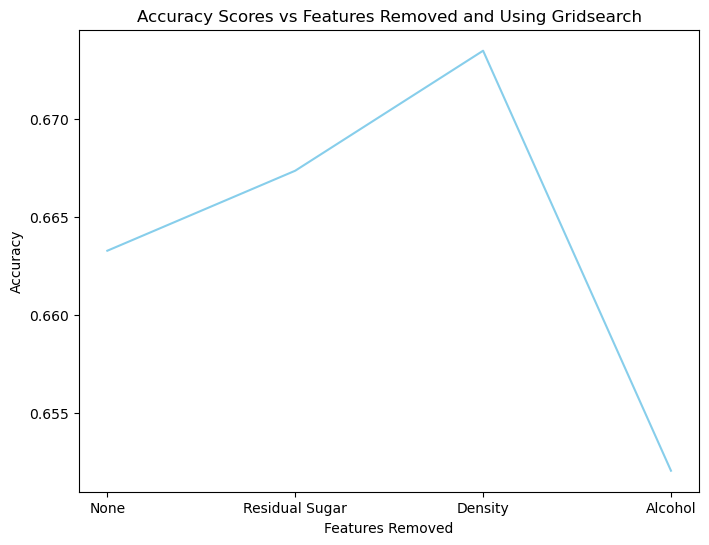

In [156]:
features = list(accuracy_scores.keys())
scores = list(accuracy_scores.values())

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.plot(features, scores, color='skyblue')

# Add labels and title
plt.xlabel('Features Removed')
plt.ylabel("Accuracy")
plt.title('Accuracy Scores vs Features Removed and Using Gridsearch')

# Show the plot
plt.show()

In [271]:
metrics_scores["None"] == metrics_scores["Residual Sugar"]

True

### When using all outputs, the accuracy was highest when we removed density. When we consolidated all classes, though, this reduced the effect of removing it on performance. Let's run this again calculating all metric scores and all ouput classes (0-10)

In [295]:
# We call the csv data
df2 = pd.read_csv('/Users/manarogers/Desktop/WinePrediction/data/raw/winequalityN.csv')
# We fill the NaN numerical values with 0
df2.fillna(df2.select_dtypes(include='number').mean(), inplace=True)

# White wine
dfW2 = df2[df['type'] == 'white']
dfW2 = dfW2.drop('type', axis=1)

In [301]:
metrics_scores2 = {}
features_dropped2 = {}

In [303]:
#Get the accuracy using all features and Gridsearch for the best hyperparameters
metrics2 = get_SVM_Metrics(dfW2, param_grid = param_grid, scale_features=True)

# Print the accuracy score
print(f"Model metrics: {metrics2}")
metrics_scores2["None"] = metrics2 

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters found: {'C': 12, 'gamma': 1}
Accuracy: 0.6633
Precision: 0.6758
Recall: 0.6633
F1 Score: 0.6552
Model metrics: (0.6632653061224489, 0.6757540890598495, 0.6632653061224489, 0.6552414323272256)


In [305]:
#Get the accuracy using without residual sugar using Gridsearch
dfW_no_residual_sugar2 = dfW2.drop(columns=['residual sugar'])

metrics2 = get_SVM_Metrics(dfW_no_residual_sugar2, param_grid = param_grid, scale_features=True)

# Print the accuracy score
print(f"Model metrics: {metrics2}")
metrics_scores2["Residual Sugar"] = metrics2 

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters found: {'C': 12, 'gamma': 1}
Accuracy: 0.6673
Precision: 0.6762
Recall: 0.6673
F1 Score: 0.6596
Model metrics: (0.6673469387755102, 0.6761662300845805, 0.6673469387755102, 0.659567745105431)


In [307]:
#Get the accuracy using without density using Gridsearch
dfW_no_density2 = dfW2.drop(columns=['density'])

metrics2 = get_SVM_Metrics(dfW_no_density2, param_grid = param_grid, scale_features=True)

# Print the accuracy score
print(f"Model metrics: {metrics2}")
metrics_scores2["Density"] = metrics2 

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters found: {'C': 14, 'gamma': 1}
Accuracy: 0.6735
Precision: 0.6847
Recall: 0.6735
F1 Score: 0.6654
Model metrics: (0.673469387755102, 0.6846902906617192, 0.673469387755102, 0.6654267189594786)


In [309]:
#Get the accuracy using without alcohol using Gridsearch
dfW_no_alcohol2 =  dfW2.drop(columns=['alcohol'])

metrics2 = get_SVM_Metrics(dfW_no_alcohol2, param_grid = param_grid, scale_features=True)

# Print the accuracy score
print(f"Model metrics: {metrics2}")
metrics_scores2["Alcohol"] = metrics2

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters found: {'C': 11, 'gamma': 1}
Accuracy: 0.6520
Precision: 0.6617
Recall: 0.6520
F1 Score: 0.6442
Model metrics: (0.6520408163265307, 0.6617432444335098, 0.6520408163265307, 0.6441647420490567)


In [311]:
print(metrics_scores2)

{'None': (0.6632653061224489, 0.6757540890598495, 0.6632653061224489, 0.6552414323272256), 'Residual Sugar': (0.6673469387755102, 0.6761662300845805, 0.6673469387755102, 0.659567745105431), 'Density': (0.673469387755102, 0.6846902906617192, 0.673469387755102, 0.6654267189594786), 'Alcohol': (0.6520408163265307, 0.6617432444335098, 0.6520408163265307, 0.6441647420490567)}


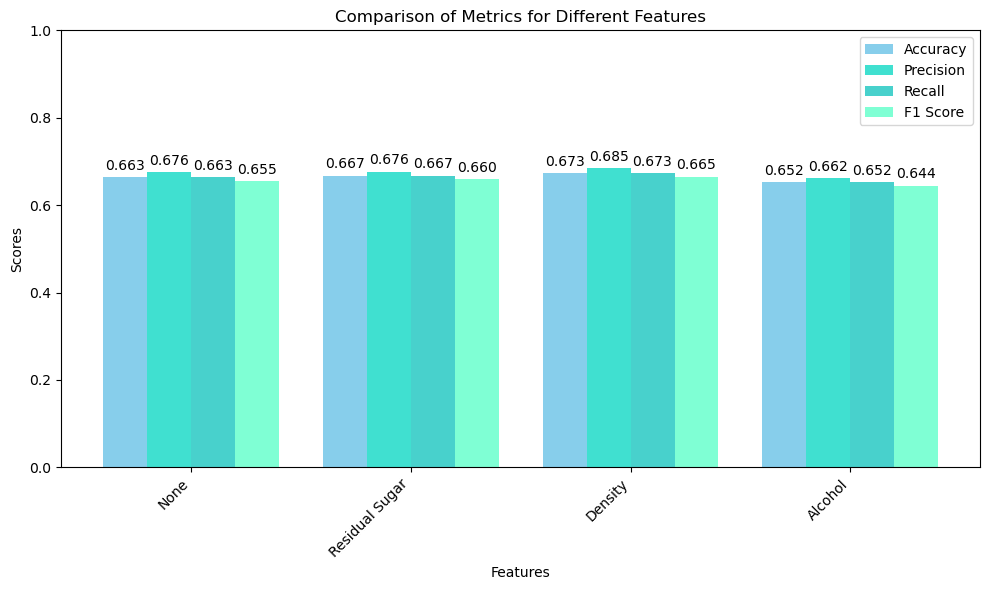

In [322]:
# Extracting keys (features) and the corresponding metric values
features2 = list(metrics_scores2.keys())
metrics2 = np.array(list(metrics_scores2.values()))

# Extracting individual metrics (accuracy, precision, recall, F1)
accuracy_scores2 = metrics2[:, 0]
precision_scores2 = metrics2[:, 1]
recall_scores2 = metrics2[:, 2]
f1_scores2 = metrics2[:, 3]

# Set up the bar plot width and positions
x = np.arange(len(features))  # positions for the bars
width = 0.2  # the width of the bars

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each metric (accuracy, precision, recall, F1)
bars1_2 = ax.bar(x - width * 1.5, accuracy_scores2, width, label='Accuracy', color='skyblue')
bars2_2 = ax.bar(x - width * 0.5, precision_scores2, width, label='Precision', color='turquoise')
bars3_2 = ax.bar(x + width * 0.5, recall_scores2, width, label='Recall', color='mediumturquoise')
bars4_2 = ax.bar(x + width * 1.5, f1_scores2, width, label='F1 Score', color='aquamarine')

# Add labels, title, and custom x-axis ticks
ax.set_xlabel('Features')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Metrics for Different Features')
ax.set_xticks(x)
ax.set_xticklabels(features, rotation=45, ha="right")

#adjust range of y visualized
ax.set_ylim(0, 1)

# Add values on top of the bars using the values from metrics_scores
for i, feature in enumerate(features2):
    accuracy2 = metrics_scores2[feature][0]
    precision2 = metrics_scores2[feature][1]
    recall2 = metrics_scores2[feature][2]
    f12 = metrics_scores2[feature][3]

    # Adding text labels above each bar for each metric
    ax.text(x[i] - width * 1.5, accuracy2 + 0.01, f'{accuracy2:.3f}', ha='center', va='bottom', fontsize=10)
    ax.text(x[i] - width * 0.5, precision2 + 0.01, f'{precision2:.3f}', ha='center', va='bottom', fontsize=10)
    ax.text(x[i] + width * 0.5, recall2 + 0.01, f'{recall2:.3f}', ha='center', va='bottom', fontsize=10)
    ax.text(x[i] + width * 1.5, f12 + 0.01, f'{f12:.3f}', ha='center', va='bottom', fontsize=10)

# Add legend
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()